## Teste Z de duas amostras

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats import weightstats

In [2]:
df = pd.read_csv('Two_Machines.csv')

In [3]:
df.head()

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1


In [4]:
df.describe()

,Volume
count,200.000000
mean,151.538350
std,2.180823
min,145.440000
25%,150.015000
50%,151.515000
75%,153.110000
max,156.230000


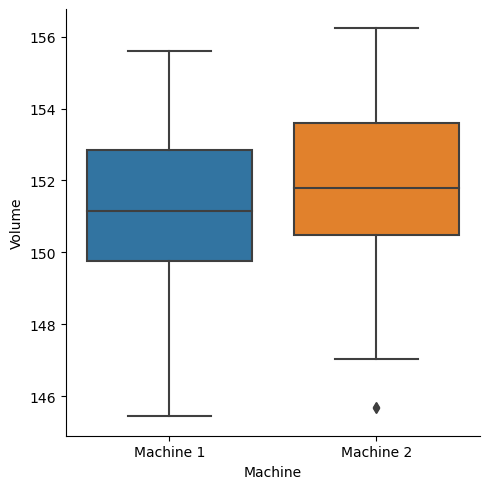

In [5]:
sns.catplot(x='Machine', y='Volume', data=df, kind='box')

Vamos agora fazer o teste Z para as duas máquinas (Teste Z de duas amostras). \
Começamos filtrando os volumes da Máquina 1.

In [19]:
m1 = df[df['Machine']=='Machine 1']['Volume']
m2=df[df['Machine']=='Machine 2']['Volume']



In [7]:
weightstats.ztest(m1,m2)

(-2.189406040190184, 0.028567341032618248)

o segundo valor do resultado é o pvalue, voce compara ele com seu alpha que nesse caso é 0,05 dado no slide. Se ele for menor, vc recusa a hipotese nula, se ele for maior vc valida. Hipótese NULA RECUSADA AQUI.

Exercício 1 \


A biblioteca Seaborn tem vários "built-in" datasets.

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [9]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Primeiro é necessário verificar se há no mínimo 30 amostras para que seja possível realizar o teste Z.

In [10]:
tips.head(30)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Podemos obter maiores informações sobre o nosso dataset usando a função describe e plotando um gráfico.

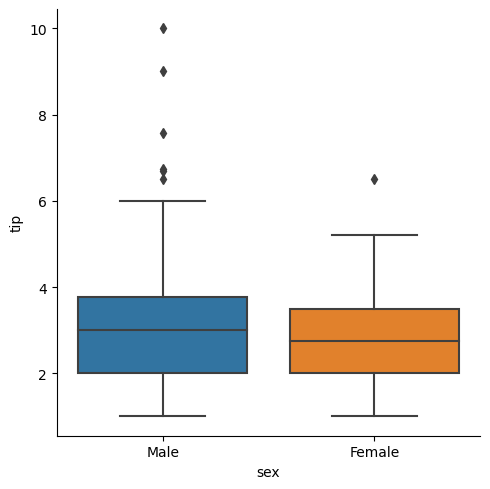

In [11]:
sns.catplot(x='sex', y='tip', data=tips, kind='box')

Vamos plotar um boxplot para observar como as gorjetas estão distribuídas entre homens e mulheres.

Para realizar nosso Teste Z, a primeira a fazer é filtrar as gorjetas por sexo.

In [12]:
homem = tips[tips['sex']=='Male']['tip']
mulher = tips[tips['sex']=='Female']['tip']

In [13]:
weightstats.ztest(homem,mulher)

(1.3878597054212687, 0.1651797698624794)

Hipótese nula aprovada

Exercício 2 /
Lunch vs Dinner

(-1.9062569301202392, 0.05661687925222567)

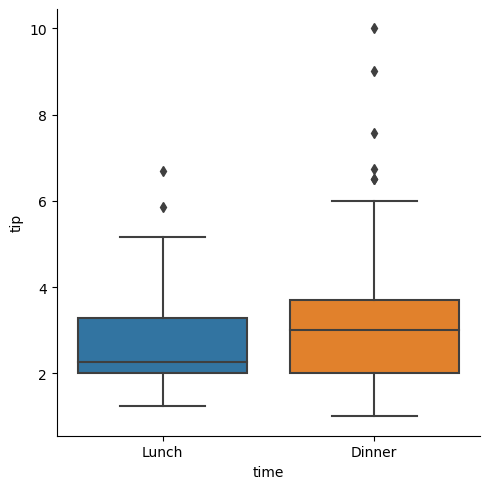

In [14]:
sns.catplot(x='time', y='tip', data=tips, kind='box')
lunch=tips[tips['time']=='Lunch']['tip']
dinner = tips[tips['time']=='Dinner']['tip']
weightstats.ztest(lunch, dinner)

## Teste t de duas amostras

Exemplo 1: Amostras envasadas por duas máquinas têm apresentam os seguintes volumes: \
Máquina A: 150, 152, 154, 152, 151 \
Máquina B: 156, 155, 158, 155, 154 \
A média é diferente? Calcular com 95% de confiança.

In [15]:
m1 = [150, 152, 154, 152, 151]
m2 = [156, 155, 158, 155, 154]

In [16]:
stats.ttest_ind(m1, m2, equal_var=True)

Ttest_indResult(statistic=-4.005551702879929, pvalue=0.003919295477128331)

Exemplo 2: Amostras envasadas por duas máquinas têm apresentam os seguintes volumes: \
Máquina A: 150, 152, 154, 152, 151 \
Máquina C: 144, 162, 177, 150, 140 \
A média é diferente? Calcular com 95% de confiança.

In [17]:
m1 = [150, 152, 154, 152, 151]
m3 = [144, 162, 177, 150, 140]

In [18]:
stats.ttest_ind(m1,m3, equal_var=False)

Ttest_indResult(statistic=-0.4146442144313621, pvalue=0.699289145758865)